In [1]:
import sys
import pylab as pl
import numpy as np

In [2]:
ltype = ["-","--"]

In [3]:
b = 15
shadow = 76

(-308.55, 308.55, -171.05, 1370.05)

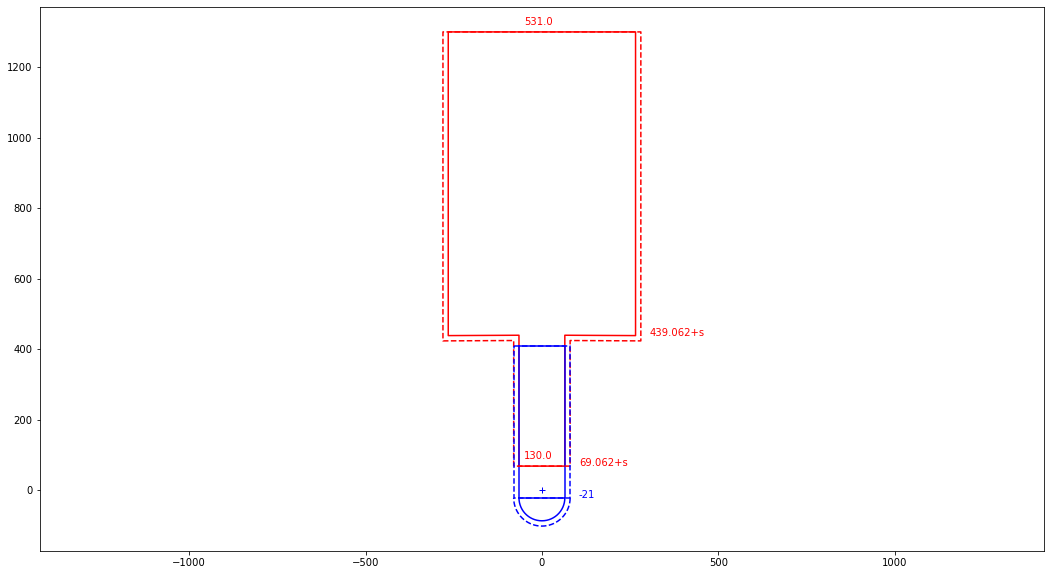

In [4]:
#3 parts: baffle tube, slider shaft, slider body
baffle_tube_full_width = 130
slider_shaft_length = 370
slider_body_width = 265.5
slider_body_back  = 1300
tip_center_to_mirror = -21 #negative means the tip is long

#same as before, needs to be verified with current drawing
baffle_tube_front = -80
baffle_tube_back  = 409

slider_shaft_front = 69.062

#i = 0
#buffer = 0
#i = 1
#buffer = b

# Run this twice so the plot shows the probe outline with no buffer (solid)
# and with the buffer (dashed)
# 
fig, ax = pl.subplots(1,1,figsize=(18,10))
for i,buffer in enumerate([0, b]):
    baffle_tube_width =  baffle_tube_full_width/2

    baffle_tube_front -= buffer
    baffle_tube_width += buffer

    slider_shaft_width = baffle_tube_full_width/2

    slider_shaft_back  = slider_shaft_front + slider_shaft_length + 1

    slider_shaft_back  -= buffer
    slider_shaft_width += buffer

    slider_body_front = slider_shaft_back - 1

    slider_body_width += buffer
    
    pl.plot([-slider_shaft_width, -slider_shaft_width, -slider_body_width, -slider_body_width, slider_body_width, 
             slider_body_width, slider_shaft_width, slider_shaft_width, -slider_shaft_width],
            [slider_shaft_front,  slider_shaft_back,    slider_body_front,  slider_body_back,  slider_body_back,  
             slider_body_front, slider_shaft_back,  slider_shaft_front,  slider_shaft_front],
            color="r", linestyle=ltype[i]
           )
    if (i==0):
        pl.text(-50, slider_shaft_front+20, str(2*slider_shaft_width),color="r")
        pl.text(-50, slider_body_back+20,  str(2*slider_body_width),color="r")
        pl.text(baffle_tube_width+40, tip_center_to_mirror, str(tip_center_to_mirror), color="b")
        pl.text(slider_shaft_width+40, slider_shaft_front, str(slider_shaft_front)+"+s", color="r")
        pl.text(slider_body_width+40, slider_body_front, str(slider_body_front)+"+s", color="r")
        
    ## half-circular tip
    tip_angle = np.arange(181)
    tip_x = baffle_tube_width*np.cos(np.radians(-tip_angle))
    tip_y = baffle_tube_width*np.sin(np.radians(-tip_angle)) + tip_center_to_mirror
    pl.plot(tip_x, tip_y, color="b", linestyle=ltype[i])
    
    pl.plot([-baffle_tube_width, baffle_tube_width, tip_x[0], tip_x[-1], -baffle_tube_width],
            [ baffle_tube_back,  baffle_tube_back,  tip_y[0], tip_y[-1],  baffle_tube_back],
            color="b", linestyle=ltype[i]
            )
pl.plot(0,0, "b+")
pl.axis('equal')
#pl.axis('off')

In [5]:
prefix = "probe_"

f = open(prefix + "baffle_tube.txt", "w+")
print ("{}\t{}".format(-baffle_tube_width, baffle_tube_back), file=f)
print ("{}\t{}".format( baffle_tube_width, baffle_tube_back), file=f)
for i,j in zip(tip_x, tip_y):
    print ("{}\t{}".format(i,j), file=f)
f.close()

f = open(prefix + "slider_shaft.txt", "w+")
print ("{}\t{}".format(-slider_shaft_width, slider_shaft_back), file=f)
print ("{}\t{}".format( slider_shaft_width, slider_shaft_back), file=f)
print ("{}\t{}".format( slider_shaft_width, slider_shaft_front), file=f)
print ("{}\t{}".format(-slider_shaft_width, slider_shaft_front), file=f)
f.close()

f = open(prefix + "slider_body.txt", "w+")
print ("{}\t{}".format(-slider_body_width, slider_body_back), file=f)
print ("{}\t{}".format( slider_body_width, slider_body_back), file=f)
print ("{}\t{}".format( slider_body_width, slider_body_front), file=f)
print ("{}\t{}".format(-slider_body_width, slider_body_front), file=f)
f.close()

In [6]:
baffle_tube_front -= (shadow/2 - buffer)
baffle_tube_width += (shadow/2 - buffer)
tip_x = baffle_tube_width*np.cos(np.radians(-tip_angle))
tip_y = baffle_tube_width*np.sin(np.radians(-tip_angle)) + tip_center_to_mirror
slider_body_front  -= (shadow/2 - buffer)
slider_shaft_width += (shadow/2 - buffer)
slider_body_width += (shadow/2 - buffer)

In [7]:
prefix = "shadow_"

f = open(prefix + "baffle_tube.txt", "w+")
print ("{}\t{}".format(-baffle_tube_width, baffle_tube_back), file=f)
print ("{}\t{}".format( baffle_tube_width, baffle_tube_back), file=f)
for i,j in zip(tip_x, tip_y):
    print ("{}\t{}".format(i,j), file=f)
f.close()

f = open(prefix + "slider_shaft.txt", "w+")
print ("{}\t{}".format(-slider_shaft_width, slider_shaft_back), file=f)
print ("{}\t{}".format( slider_shaft_width, slider_shaft_back), file=f)
print ("{}\t{}".format( slider_shaft_width, slider_shaft_front), file=f)
print ("{}\t{}".format(-slider_shaft_width, slider_shaft_front), file=f)
f.close()

f = open(prefix + "slider_body.txt", "w+")
print ("{}\t{}".format(-slider_body_width, slider_body_back), file=f)
print ("{}\t{}".format( slider_body_width, slider_body_back), file=f)
print ("{}\t{}".format( slider_body_width, slider_body_front), file=f)
print ("{}\t{}".format(-slider_body_width, slider_body_front), file=f)
f.close()